<a href="https://colab.research.google.com/github/zulfijauh/Data-Science/blob/main/Final_Project_Digital_Skola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.stats.weightstats import ztest

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from imblearn.metrics import sensitivity_specificity_support

from sklearn.model_selection import cross_val_score, cross_val_predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Understanding Dataset

In [4]:
# Original Data
data = pd.read_csv('https://raw.githubusercontent.com/zulfijauh/Data-Science/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Melihat variable, tipe data, jumlah baris dan kolom, dan null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# 11 row blank values pada kolom TotalCharges karena tenure masih 0 sehingga tipe data dianggap object
data[['tenure','TotalCharges']].loc[(data['tenure']== 0)]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [13]:
# TotalCharges tidak sesuai perkalian tenure dengan MonthlyCharges
data[['tenure','MonthlyCharges','TotalCharges']].loc[(data['tenure'] >= 2)].head()

,tenure,MonthlyCharges,TotalCharges
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.5


In [15]:
# Melihat perbandingan target class. Terjadi imbalance dataset
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Cleansing

Anomali terdeteksi
- Blank sting pada TotalCharges
- Nilai TotalCharges tidak sesuai jumlah tenure x MonthlyCharges
- Imbalance Dataset

In [25]:
# Create copy Dataframe untuk cleansing
clean = data

In [26]:
# Memperbaiki kolom TotalCharges
clean['TotalCharges'] = clean['tenure']*clean['MonthlyCharges']

In [27]:
clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


# Visualization

Text(0.5, 1.0, 'Churn')

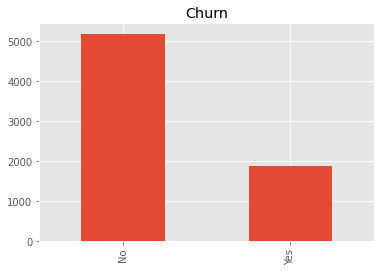

In [107]:

clean['Churn'].value_counts().plot.bar().set_title('Churn')

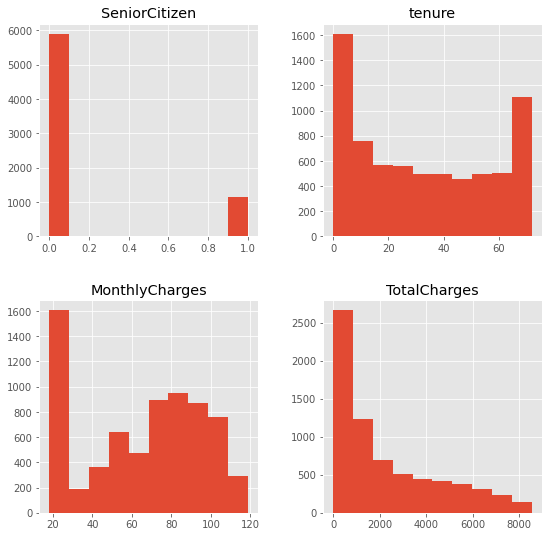

In [108]:
# Melihat sebaran data
clean.hist(figsize=(9,9))
plt.show()

## Melihat karakter setiap variable terhadap Churn

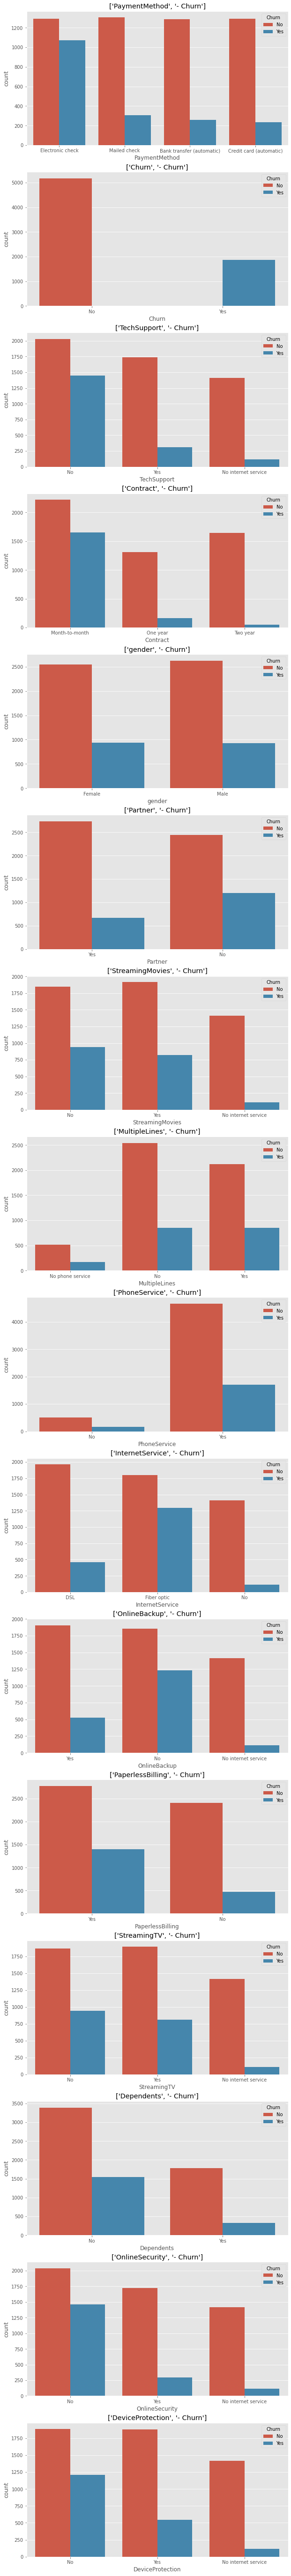

In [109]:
category = clean.select_dtypes(include=['object']).columns.drop('customerID','Churn')

f,ax = plt.subplots(len(set(category)),1,figsize=(10,100))
for i in list(category.values):
    sns.countplot(x=clean[i],hue=clean.Churn,ax=ax[list(set(category)).index(i)]).set_title([i,'- Churn'])

# Classification Modeling

In [31]:
# memisahkan data menjadi X untuk input variable, dan y untuk target class
df_X = clean.drop(['customerID',	'Churn'],axis=1)
df_y = clean[['Churn']]

### Model Function


In [32]:
# Modeling Function
def label(scale,sample,method):
  global df_X,df_y

  X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=1)

  le = LabelEncoder()
  y_train = le.fit_transform(y_train['Churn'])
  y_test = le.fit_transform(y_test['Churn'])

  cats = df_X.select_dtypes(include=['object','bool']).columns
  features = list(cats.values)
  for i in features:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.fit_transform(X_test[i])
  
  # Pre processing
  scaler = scale().fit(X_train)
  X_train_std = scaler.transform(X_train)
  X_test_std = scaler.transform(X_test)
  
  # Resampling
  sampling = sample(random_state=0)
  X_resampled, y_resampled = sampling.fit_resample(X_train, y_train)
  
  # Modeling
  model=method
  model.fit(X_resampled, y_resampled)

  y_pred = model.predict(X_test)

  print('Accuracy ',accuracy_score(y_test, y_pred))    
  print('Precision ',precision_score(y_test, y_pred, average='macro'))  
  print('Recall ',recall_score(y_test, y_pred, average='macro')) 
  print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
  plt.show()

# Modeling Function
def onehot(scale,sample,method):
  global df_X,df_y

  X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=1)
  
  cats = df_X.select_dtypes(include=['object','bool']).columns
  features = list(cats.values)
  X_train = pd.get_dummies(X_train, columns=features, drop_first=None)
  X_test = pd.get_dummies(X_test, columns=features, drop_first=None)
  y_train = pd.get_dummies(y_train, columns=['Churn'], drop_first=True)
  y_test = pd.get_dummies(y_test, columns=['Churn'], drop_first=True)
  
  # Pre processing
  scaler = scale().fit(X_train)
  X_train_std = scaler.transform(X_train)
  X_test_std = scaler.transform(X_test)
  
  # Sampling
  sampling = sample(random_state=0)
  X_resampled, y_resampled = sampling.fit_resample(X_train, y_train)
  
  # Modeling
  model=method
  model.fit(X_resampled, y_resampled)

  y_pred = model.predict(X_test)

  print('Accuracy ',accuracy_score(y_test, y_pred))    
  print('Precision ',precision_score(y_test, y_pred, average='macro'))  
  print('Recall ',recall_score(y_test, y_pred, average='macro')) 
  print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
  plt.show()

### Testing
- label(scale,sample,method):
- onehot(scale,sample,method):

Classifier:
- KNeighborsClassifier(n_neighbors=10)
- DecisionTreeClassifier(criterion="entropy")
- RandomForestClassifier()
- AdaBoostClassifier()
- MLPClassifier()

Scaler:
- StandardScaler
- MinMaxScaler

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  0.804070042593469
Precision  0.7423077486558155
Recall  0.6976292897428544
Confusion matrix  [[1443  142]
 [ 272  256]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


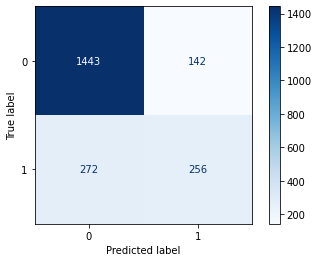

In [ ]:
onehot(MinMaxScaler,SMOTE,MLPClassifier())

# Churn Segmentation

In [110]:
# Memilih data dengan 
churn = clean.loc[(clean['Churn']== 'Yes')].drop(['customerID','Churn'],axis=1)

In [111]:
le = LabelEncoder()

cats_churn = churn.select_dtypes(include=['object','bool']).columns
features_churn = list(cats_churn.values)
for i in features_churn:
  churn[i] = le.fit_transform(churn[i])

In [112]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.7
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.4
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,797.2
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2934.4
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5081.3


In [113]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1869 non-null   int64  
 1   SeniorCitizen     1869 non-null   int64  
 2   Partner           1869 non-null   int64  
 3   Dependents        1869 non-null   int64  
 4   tenure            1869 non-null   int64  
 5   PhoneService      1869 non-null   int64  
 6   MultipleLines     1869 non-null   int64  
 7   InternetService   1869 non-null   int64  
 8   OnlineSecurity    1869 non-null   int64  
 9   OnlineBackup      1869 non-null   int64  
 10  DeviceProtection  1869 non-null   int64  
 11  TechSupport       1869 non-null   int64  
 12  StreamingTV       1869 non-null   int64  
 13  StreamingMovies   1869 non-null   int64  
 14  Contract          1869 non-null   int64  
 15  PaperlessBilling  1869 non-null   int64  
 16  PaymentMethod     1869 non-null   int64  


In [114]:
X = churn.astype(float).values
scaler = StandardScaler().fit(X)
X_new = scaler.transform(X)
X_new

array([[ 1.00482706e+00, -5.84558417e-01, -7.46659226e-01, ...,
         1.39378199e+00, -8.35027919e-01, -7.54880663e-01],
       [-9.95196129e-01, -5.84558417e-01, -7.46659226e-01, ...,
         2.65597260e-01, -1.51719998e-01, -7.37014717e-01],
       [-9.95196129e-01, -5.84558417e-01, -7.46659226e-01, ...,
         2.65597260e-01,  1.02227195e+00, -3.89344466e-01],
       ...,
       [ 1.00482706e+00,  1.71069301e+00, -7.46659226e-01, ...,
         2.65597260e-01,  5.30696160e-02, -7.71818852e-01],
       [-9.95196129e-01, -5.84558417e-01, -7.46659226e-01, ...,
        -8.62587466e-01,  1.15609487e+00,  2.84478938e+00],
       [ 1.00482706e+00,  1.71069301e+00,  1.33929906e+00, ...,
         1.39378199e+00, -1.67612242e-03, -6.54205791e-01]])

## Modeling

### K-Means

In [115]:
from sklearn.cluster import KMeans

#### Elbow Method

In [116]:
inertia_list = []
for num_clusters in range(1, 14):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(X_new)
    inertia_list.append(kmeans_model.inertia_)
    print("For n_clusters = {}, inertia value is {})".format(num_clusters, kmeans_model.inertia_))

For n_clusters = 1, inertia value is 35511.000000000065)
For n_clusters = 2, inertia value is 30237.226815283306)
For n_clusters = 3, inertia value is 27800.437126936908)
For n_clusters = 4, inertia value is 25766.29381243787)
For n_clusters = 5, inertia value is 24258.70746113842)
For n_clusters = 6, inertia value is 23084.073628608487)
For n_clusters = 7, inertia value is 22384.4187266983)
For n_clusters = 8, inertia value is 21396.720029793076)
For n_clusters = 9, inertia value is 20848.85112618053)
For n_clusters = 10, inertia value is 20292.29056547081)
For n_clusters = 11, inertia value is 19968.006916207356)
For n_clusters = 12, inertia value is 19582.693952103386)
For n_clusters = 13, inertia value is 19161.55615999183)


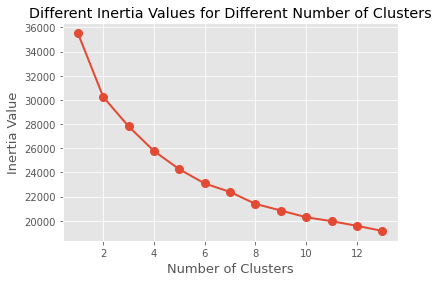

In [117]:
plt.plot(range(1,14),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [118]:
pip install kneed

In [119]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,14),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

5
5


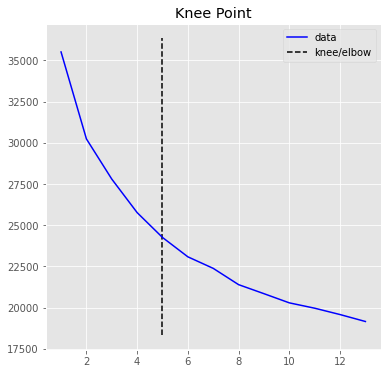

In [120]:
# Knee point adalah 5
plt.style.use('ggplot')
kneedle.plot_knee()

#### Silhouette Method

In [121]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [122]:
sh_list = []
for num_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(X_new)
   
    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.17549962075320838)
For n_clusters = 3, silhouette score is 0.11545726479716788)
For n_clusters = 4, silhouette score is 0.12265610100336152)
For n_clusters = 5, silhouette score is 0.13832202796267606)
For n_clusters = 6, silhouette score is 0.13928041388162476)
For n_clusters = 7, silhouette score is 0.12746328340624788)
For n_clusters = 8, silhouette score is 0.12190074776306305)
For n_clusters = 9, silhouette score is 0.11509108327100342)
For n_clusters = 10, silhouette score is 0.10875798102240306)
For n_clusters = 11, silhouette score is 0.10393805573200045)
For n_clusters = 12, silhouette score is 0.10069215585411397)
For n_clusters = 13, silhouette score is 0.10654239127190418)


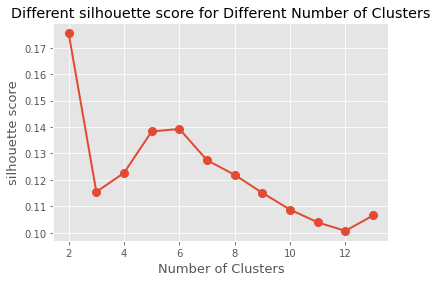

In [123]:
plt.plot(range(2,14),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()
# score tertinggi adalah K=2

#### K-Means

In [124]:
# Add cluster labels
k_means = KMeans(n_clusters = 4, random_state = 42)
k_means.fit(X_new)
labels = k_means.labels_
churn['cluster_labels'] = labels
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.7,2
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.4,2
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,797.2,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2934.4,1
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5081.3,3


In [125]:
# Check centroids
centroids = k_means.cluster_centers_
centroids

array([[ 5.35965185e-02,  1.72453120e-02, -4.71000447e-02,
        -1.06142830e-01, -1.91608523e-01, -3.16134744e+00,
        -5.61175534e-04, -1.56309822e+00, -6.31784885e-02,
        -6.63209219e-02, -1.18783828e-01, -1.15634666e-01,
        -2.19264873e-01, -1.35360396e-01, -1.76334508e-01,
        -1.10353924e-01,  9.36178813e-02, -1.52286089e+00,
        -4.95414551e-01],
       [-1.42930367e-02,  3.07227171e-01,  7.70950016e-02,
        -1.28147380e-01,  5.97038493e-02,  3.16320815e-01,
         5.27197606e-01,  2.97074690e-01, -1.72177797e-01,
        -1.68455984e-02,  1.58598866e-01, -1.77771064e-01,
         5.05615916e-01,  5.80064343e-01, -3.07386069e-01,
         3.03330615e-01, -7.75289860e-02,  7.22716932e-01,
         1.24511094e-01],
       [-3.02514469e-02, -2.07104735e-01, -2.52284590e-01,
         1.51379401e-02, -5.59437055e-01,  3.16320815e-01,
        -5.62392884e-01,  6.98139137e-02, -3.75958282e-02,
        -2.15377794e-01, -3.38450344e-01, -8.38202210e-02,
    

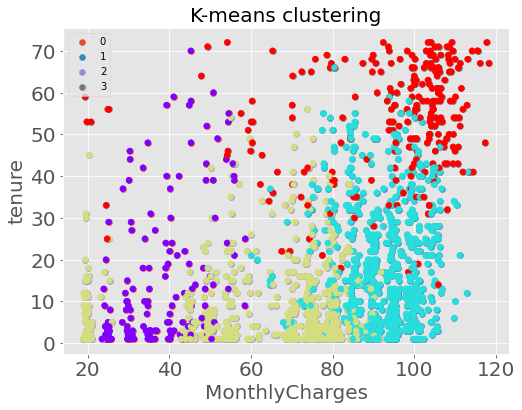

In [126]:
# Visualize cluster spread
x1 = churn['MonthlyCharges']
x2 = churn['tenure']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels) 
for i in u_labels:
    plt.scatter(x1[churn['cluster_labels'] == i] , x2[churn['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_means.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-means clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

### K-Medoids

In [127]:
pip install scikit-learn-extra

#### Elbow Method

In [128]:
from sklearn_extra.cluster import KMedoids

inertia_list = []
for num_clusters in range(1, 14):
    kmedoids_model = KMedoids(n_clusters=num_clusters)
    kmedoids_model.fit(X_new)
    inertia_list.append(kmedoids_model.inertia_)
    print(f"The inertia of {num_clusters} clusters : {kmedoids_model.inertia_}")

The inertia of 1 clusters : 9184.379768791703
The inertia of 2 clusters : 8774.569976123363
The inertia of 3 clusters : 8063.499308019372
The inertia of 4 clusters : 7946.799933174203
The inertia of 5 clusters : 7547.343816157072
The inertia of 6 clusters : 7513.606074375508
The inertia of 7 clusters : 7501.653633457563
The inertia of 8 clusters : 7200.591857784495
The inertia of 9 clusters : 7100.36589875546
The inertia of 10 clusters : 7081.157755095237
The inertia of 11 clusters : 7039.996536938798
The inertia of 12 clusters : 6948.2934079916595
The inertia of 13 clusters : 6704.890686442678


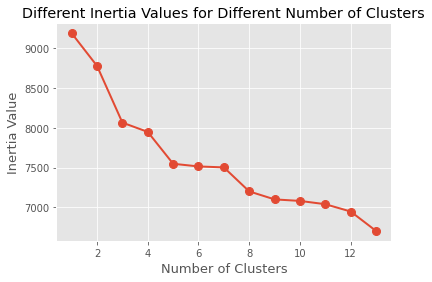

In [129]:
plt.plot(range(1,14),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [130]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,14),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

5
5


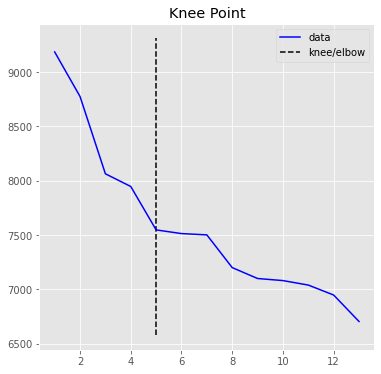

In [131]:
# Knee point terletak pada K=5
plt.style.use('ggplot')
kneedle.plot_knee()

#### Silhouette Method

In [132]:
sh_list = []
for num_clusters in range(2, 14):
    kmedoids = KMedoids(n_clusters=num_clusters)
    cluster_labels = kmedoids.fit_predict(X_new)
   
    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.059368966744357335)
For n_clusters = 3, silhouette score is 0.06713282111314423)
For n_clusters = 4, silhouette score is 0.05474258804915017)
For n_clusters = 5, silhouette score is 0.0823234378780511)
For n_clusters = 6, silhouette score is 0.06641797866765356)
For n_clusters = 7, silhouette score is 0.05893807345237346)
For n_clusters = 8, silhouette score is 0.06944127101758117)
For n_clusters = 9, silhouette score is 0.06884197145076229)
For n_clusters = 10, silhouette score is 0.06544706858891639)
For n_clusters = 11, silhouette score is 0.05081396769737477)
For n_clusters = 12, silhouette score is 0.042457021368404436)
For n_clusters = 13, silhouette score is 0.06291705033200226)


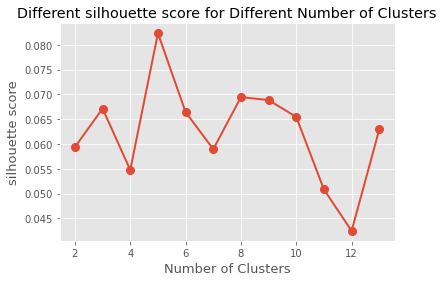

In [133]:
plt.plot(range(2,14),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()

#### K-Medoids

In [134]:
k_medoids = KMedoids(n_clusters = 5, random_state = 42)
k_medoids.fit(X_new)
labels = k_medoids.labels_
churn['cluster_labels'] = labels
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.7,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.4,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,797.2,2
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2934.4,2
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5081.3,2


In [135]:
centroids = k_medoids.cluster_centers_
centroids

array([[ 1.00482706e+00, -5.84558417e-01, -7.46659226e-01,
        -4.59648489e-01, -6.64713790e-01,  3.16320815e-01,
        -1.04939825e+00,  3.55109642e-01, -5.07028699e-01,
        -6.95389208e-01, -7.14049330e-01, -5.19418374e-01,
        -9.63426543e-01, -9.67559671e-01, -3.38111524e-01,
         5.78791845e-01,  2.65597260e-01, -1.92272397e-01,
        -6.27221321e-01],
       [-9.95196129e-01, -5.84558417e-01, -7.46659226e-01,
        -4.59648489e-01, -7.15927826e-01,  3.16320815e-01,
        -1.04939825e+00,  3.55109642e-01, -5.07028699e-01,
        -6.95389208e-01, -7.14049330e-01, -5.19418374e-01,
        -9.63426543e-01, -9.67559671e-01, -3.38111524e-01,
         5.78791845e-01,  2.65597260e-01, -1.74023818e-01,
        -6.63218286e-01],
       [ 1.00482706e+00, -5.84558417e-01,  1.33929906e+00,
        -4.59648489e-01,  8.20493240e-01,  3.16320815e-01,
         1.04827590e+00,  3.55109642e-01, -5.07028699e-01,
        -6.95389208e-01,  1.50466754e+00, -5.19418374e-01,
    

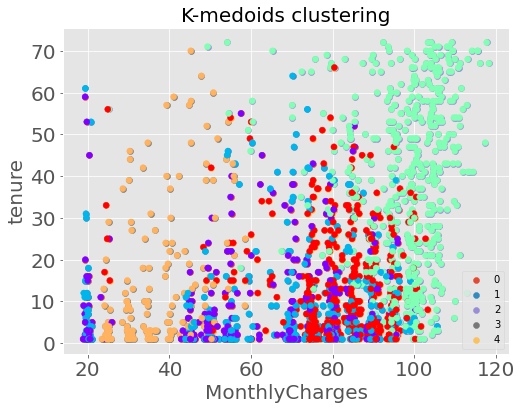

In [136]:
x1 = churn['MonthlyCharges']
x2 = churn['tenure']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels) 
for i in u_labels:
    plt.scatter(x1[churn['cluster_labels'] == i] , x2[churn['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_medoids.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-medoids clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

### Segmenting
K-Means elbow method terlihat paling baik

In [137]:
k_means = KMeans(n_clusters = 4, random_state = 42)
k_means.fit(X_new)
labels = k_means.labels_
churn['cluster_labels'] = labels
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.7,2
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.4,2
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,797.2,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2934.4,1
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5081.3,3


In [138]:
centroids = k_means.cluster_centers_
centroids

array([[ 5.35965185e-02,  1.72453120e-02, -4.71000447e-02,
        -1.06142830e-01, -1.91608523e-01, -3.16134744e+00,
        -5.61175534e-04, -1.56309822e+00, -6.31784885e-02,
        -6.63209219e-02, -1.18783828e-01, -1.15634666e-01,
        -2.19264873e-01, -1.35360396e-01, -1.76334508e-01,
        -1.10353924e-01,  9.36178813e-02, -1.52286089e+00,
        -4.95414551e-01],
       [-1.42930367e-02,  3.07227171e-01,  7.70950016e-02,
        -1.28147380e-01,  5.97038493e-02,  3.16320815e-01,
         5.27197606e-01,  2.97074690e-01, -1.72177797e-01,
        -1.68455984e-02,  1.58598866e-01, -1.77771064e-01,
         5.05615916e-01,  5.80064343e-01, -3.07386069e-01,
         3.03330615e-01, -7.75289860e-02,  7.22716932e-01,
         1.24511094e-01],
       [-3.02514469e-02, -2.07104735e-01, -2.52284590e-01,
         1.51379401e-02, -5.59437055e-01,  3.16320815e-01,
        -5.62392884e-01,  6.98139137e-02, -3.75958282e-02,
        -2.15377794e-01, -3.38450344e-01, -8.38202210e-02,
    

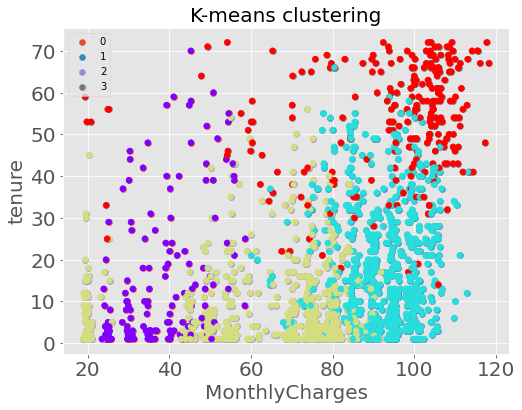

In [139]:
x1 = churn['MonthlyCharges']
x2 = churn['tenure']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels) 
for i in u_labels:
    plt.scatter(x1[churn['cluster_labels'] == i] , x2[churn['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_means.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-means clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

### Pattern

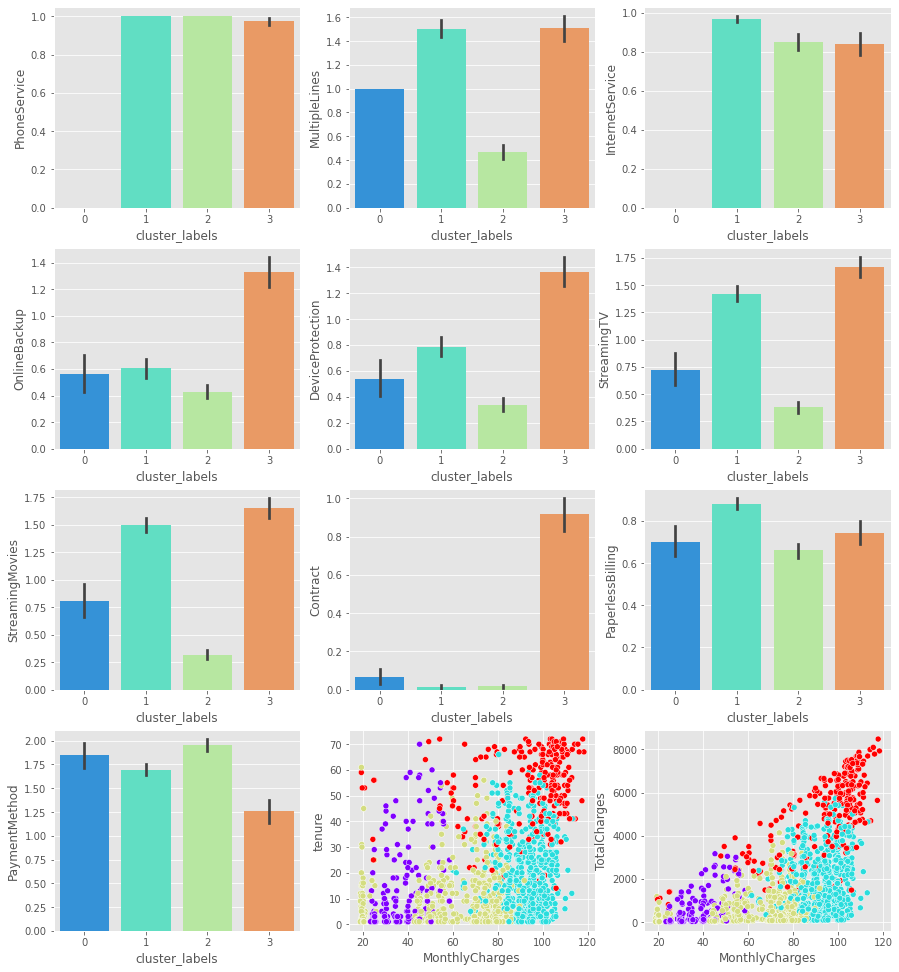

In [144]:
f,ax = plt.subplots(4,3,figsize=(15,17))
sns.barplot(x= 'cluster_labels',y = 'PhoneService', data = churn,palette="rainbow",ax=ax[0,0])
sns.barplot(x= 'cluster_labels',y = 'MultipleLines', data = churn,palette="rainbow",ax=ax[0,1])
sns.barplot(x= 'cluster_labels',y = 'InternetService', data = churn,palette="rainbow",ax=ax[0,2])
sns.barplot(x= 'cluster_labels',y = 'OnlineBackup', data = churn,palette="rainbow",ax=ax[1,0])
sns.barplot(x= 'cluster_labels',y = 'DeviceProtection', data = churn,palette="rainbow",ax=ax[1,1])
sns.barplot(x= 'cluster_labels',y = 'StreamingTV', data = churn,palette="rainbow",ax=ax[1,2])
sns.barplot(x= 'cluster_labels',y = 'StreamingMovies', data = churn,palette="rainbow",ax=ax[2,0])
sns.barplot(x= 'cluster_labels',y = 'Contract', data = churn,palette="rainbow",ax=ax[2,1])
sns.barplot(x= 'cluster_labels',y = 'PaperlessBilling', data = churn,palette="rainbow",ax=ax[2,2])
sns.barplot(x= 'cluster_labels',y = 'PaymentMethod', data = churn,palette="rainbow",ax=ax[3,0])
sns.scatterplot(x= 'MonthlyCharges',y = 'tenure',hue='cluster_labels',data=churn,palette="rainbow",legend=False,ax=ax[3,1])
sns.scatterplot(x= 'MonthlyCharges',y = 'TotalCharges',hue='cluster_labels',data=churn,palette="rainbow",legend=False,ax=ax[3,2])
plt.show()

In [145]:
class0 = churn.loc[(churn['cluster_labels']== 0)]
class1 = churn.loc[(churn['cluster_labels']== 1)]
class2 = churn.loc[(churn['cluster_labels']== 2)]
class3 = churn.loc[(churn['cluster_labels']== 3)]

In [146]:
class0.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.0,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0
mean,0.524390,0.262195,0.335366,0.134146,14.237805,0.0,1.0,0.0,0.329268,0.560976,0.536585,0.304878,0.719512,0.804878,0.067073,0.701220,1.847561,36.888415,597.123171,0.0
std,0.500934,0.441175,0.473564,0.341853,16.937584,0.0,0.0,0.0,0.743972,0.901227,0.888856,0.721094,0.962797,0.983783,0.250915,0.459125,0.890264,9.560647,785.569839,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.450000,23.450000,0.0
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,29.637500,49.800000,0.0
50%,1.000000,0.000000,0.000000,0.000000,5.500000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,35.325000,216.575000,0.0
75%,1.000000,1.000000,1.000000,0.000000,21.250000,0.0,1.0,0.0,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,44.612500,856.687500,0.0
max,1.000000,1.000000,1.000000,1.000000,70.000000,0.0,1.0,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,58.600000,3167.500000,0.0


In [147]:
class1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.0,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,0.490446,0.388535,0.394904,0.125796,19.144904,1.0,1.503185,0.969745,0.248408,0.605096,0.786624,0.257962,1.420382,1.496815,0.012739,0.880573,1.695860,92.263137,1766.470382,1.0
std,0.500307,0.487806,0.489220,0.331884,14.285973,0.0,0.864868,0.171424,0.660154,0.919455,0.977749,0.670892,0.908070,0.868548,0.112235,0.324548,0.775326,8.497634,1328.933620,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.050000,85.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,7.000000,1.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,85.775000,666.837500,1.0
50%,0.000000,0.000000,0.000000,0.000000,16.000000,1.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,93.825000,1447.725000,1.0
75%,1.000000,1.000000,1.000000,0.000000,29.000000,1.0,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,98.825000,2665.612500,1.0
max,1.000000,1.000000,1.000000,1.000000,66.000000,1.0,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,113.200000,5724.600000,1.0


In [148]:
class2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.0,827.000000,827.00000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.0
mean,0.482467,0.164450,0.237001,0.180169,7.055623,1.0,0.464329,0.85127,0.348247,0.428053,0.338573,0.328900,0.379686,0.319226,0.016929,0.660218,1.954051,62.328597,455.670496,2.0
std,0.499995,0.370908,0.425500,0.384561,9.512795,0.0,0.844938,0.61921,0.669018,0.738486,0.659444,0.649585,0.698302,0.639427,0.129082,0.473922,0.883158,20.088236,648.397832,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,2.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000,70.525000,2.0
50%,0.000000,0.000000,0.000000,0.000000,3.000000,1.0,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.200000,161.500000,2.0
75%,1.000000,0.000000,0.000000,0.000000,9.000000,1.0,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,76.450000,556.325000,2.0
max,1.000000,1.000000,1.000000,1.000000,61.000000,1.0,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,91.850000,4135.600000,2.0


In [149]:
class3.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster_labels
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0
mean,0.548000,0.212000,0.680000,0.304000,53.640000,0.976000,1.512000,0.840000,0.820000,1.332000,1.364000,0.99600,1.668000,1.652000,0.916000,0.744000,1.256000,94.376600,5113.863200,3.0
std,0.498689,0.409545,0.467412,0.460905,13.194498,0.153356,0.846595,0.437224,0.971274,0.930181,0.918083,0.98787,0.726559,0.741008,0.680291,0.437297,0.939144,19.179116,1737.129232,0.0
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,19.350000,618.750000,3.0
25%,0.000000,0.000000,0.000000,0.000000,46.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,89.800000,3945.800000,3.0
50%,1.000000,0.000000,1.000000,0.000000,55.500000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.00000,2.000000,2.000000,1.000000,1.000000,1.000000,100.575000,5420.900000,3.0
75%,1.000000,0.000000,1.000000,1.000000,65.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,106.000000,6394.500000,3.0
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000,3.000000,118.350000,8481.600000,3.0
